# Chap05 - Support Vector Machine

**SVM**(Support Vector Machine)은 러시아 과학자 *Vladimir Vapnik*가 1970년대 후반에 제안한 알고리즘으로, 그 당시에는 크게 주목 받지 못했다. 하지만 1990년대에 들어 분류(classification)문제에서 우수한 일반화(generalization) 능력이 입증되어 머신러닝 알고리즘에서 인기 있는 모델이 되었다고 한다. 그리고 SVM은 일반화 측면에서 다른 분류 모델과 비교하여 더 좋거나 대등한 것으로 알려져 있다. 

또한, SVM은 선형 또는 비선형 분류 뿐만아니라 회귀, 이상치 탐색에도 사용할 수 있는 모델이며, 특히 복잡한 분류 문제에 잘 맞으며, 중간 크기의 데이터셋에 적합하다.

## Set Up

In [1]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='AppleGothic')  # MacOS
plt.rcParams['axes.unicode_minus'] = False

## 5.1 Linear SVM Classification

Linear SVM은 Train set을 분류할 수 있는 선형분리를 찾는 것이며, 즉 최적의 Decision Boundary(의사결정 영역)를 찾는다고 할 수 있다.

![](./images/svm01.png)

#### Large Margin Classification

**Large Margin Classification** 은 위의 그림 중 오른쪽 그림과 같이 두 데이터의 클래스를 분리할 수 있는 무수히 많은 직선들 중 두 데이터 클래스간의 간격(margin)이 최대로하는 **MMH**(Maximum Marginal Hyperplane, 최대 마진 초평면)을 찾아 분리하는 방법을 말한다.

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

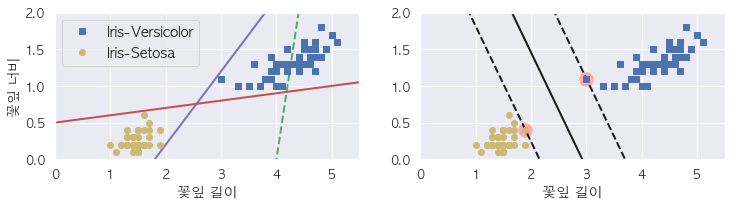

In [3]:
# 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_  # support vectors
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

위의 그림 중 오른쪽 그래프에서 붉은색으로 표시된 점, 즉 데이터 포인트를 **Support Vector**라고 하는데 그 이유는 Margin이 이 붉은색으로 표시된 데이터에 의해 결정되기 때문이다. 

#### 특성(Feature)의 스케일에 민감 

[-2, 2, -2, 2]

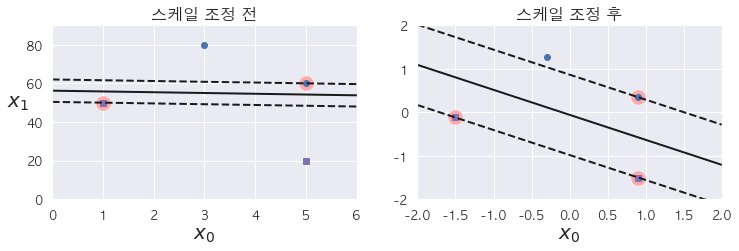

In [4]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("스케일 조정 전", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("스케일 조정 후", fontsize=16)
plt.axis([-2, 2, -2, 2])

### 5.1.1 Soft Margin Classification

위에서 살펴본 SVM 방식은 하드마진(Hard Margin) SVM이라고 한다. 하드마진 방식은 매우 엄격하게 두 개의 클래스를 분리하는 분리초평면(위에서는 선형분리)을 구하는 방법으로, 모든 Train Set은 분리 초평면을 사이에 두고 무조건 한 클래스에 속해야 한다. 

하지만, 아래의 예제에서도 알 수 있듯이 몇 개의 노이즈 또는 이상치로 인해 두 클래스를 분류하는 분리 초평면을 구할 수 조차 없거나(아래의 왼쪽 그래프), 제대로 구하지 못할 수도 있다(아래의 오른쪽 그래프).

#### 이상치(Outlier)에 민감

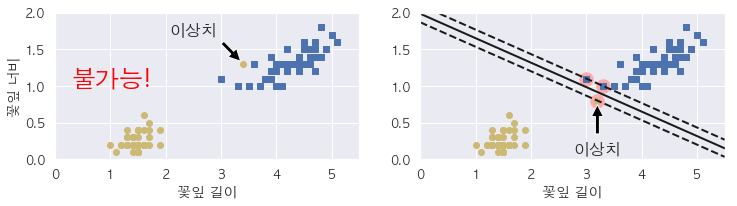

In [5]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "불가능!", fontsize=24, color="red")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.annotate("이상치",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.annotate("이상치",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

위와 같은 문제를 해결하기 위해, **소프트 마진**(Soft Margin) SVM이 개발 되었다. 소프트 마진 SVM은 기본적으로 하드 마진 방법을 기반으로 하는데, 가장 큰 차이점은 Support Vectors가 위치한 경계선에 약간의 **여유 변수**(Slack Variable)을 두는 것이다.

Scikit-Learn의 SVM 모델에서는 이러한 여유 변수를 `C`라는 하이퍼파라미터를 제공한다. `C`는 일종의 **penalty**라고 볼 수 있다.

- `C` 값을 줄이면 오류를 허용하는 정도가 커지며, Margin 또한 커진다.
- `C` 값을 크게하면 오류를 허용하는 정도가 작아지며, Margin 또한 작아진다.

아래의 예제코드는 Iris(붓꽃) 데이터셋 중 Virginca 인지 아닌지 분류하는 이진 분류기를 Scikit-Learn의 `LinearSVC`를 이용해 구현한 코드이다. 여기서 `C`의 값은 `1`로 지정했다.

In [6]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]  # petal lenght, petal width
y = (iris['target'] == 2).astype(np.float64)  # Iris - Virginca면 1 아니면 0

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('liear_svc', LinearSVC(C=1, loss='hinge', random_state=42))
])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('liear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

이번에는 `C=1`일때와 `C=100`일때의 결과를 비교해 보자.

In [48]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [49]:
# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에 
# LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

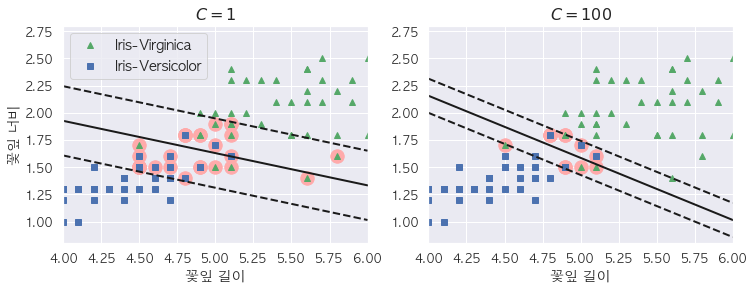

In [50]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8]);

## 5.2 NonLinear SVM Classification

실제 데이터셋은 위에서 살펴본 Linear SVM으로 분류할 수 없는 즉, 선형적으로 분류할 수 없는 비선형 적인 데이터셋이 많다. 

이러한, 비선형 데이터셋을 다루는 한 가지 방법은 다항 특성(polynomial features)과 같은 특성을 추가하는 방법이 있다. 

아래의 예제는 $x_1$ 특성에 $x_2 = (x_1)^{2}$ 을 추가하여 2차원의 데이터셋을 만들어 선형분리가 가능하게끔 해준것이다.

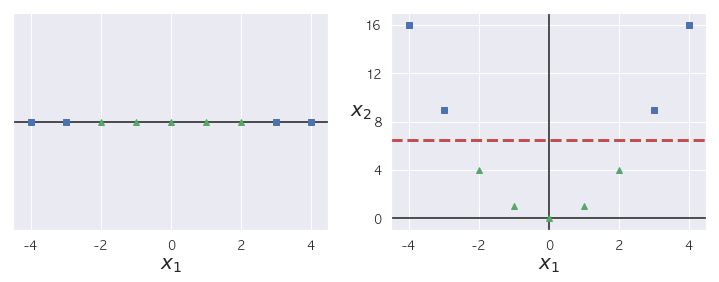

In [52]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

Scikit-Learn의 `datasets`에서 `make_moons` 데이터(Scikit-Learn에서 제공하는 두개의 반달 모양 데이터셋)를 이용해 다항 특성을 추가하는 `PolynomialFeatures`와 `StandardScaler` 그리고 `LinearSVC`를 `Pipeline`을 이용해 분류기를 만들어 보자.

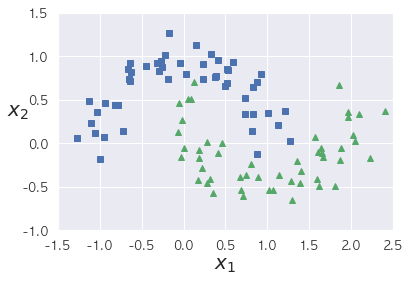

In [53]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [56]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))
])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

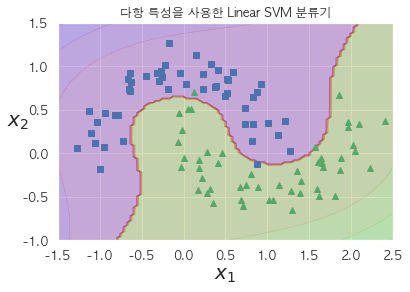

In [59]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('다항 특성을 사용한 Linear SVM 분류기')
plt.show()

### 5.2.1 다항식 커널 (Polynomial Kernel)

위에서 처럼 다항식 특성을 추가하는 것은 간단한 방법이지만, 많은 다항식 특성들이 추가되게 되면 모델의 속도가 느려진다. 

SVM에서는 이를 해결하기 위해 **커널 트릭**(kernel trick)을 이용한다. 

$$
K \left( \mathbf{a}, \mathbf{b} \right) = \left( \gamma \mathbf{a}^{T} \cdot \mathbf{b} + r \right)^{d}
$$

아래의 예제 코드는 바로 위의 코드를 kernel trick을 이용해 SVM모델을 만든것이다. Scikit-Learn에서 [`SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) 클래스에서 커널(kernel)을 사용할 수 있다. `SVC`의 인자 중 `coef0`은 위의 식에서 $r$에 해당하는 부분이다. 

- 커널은 차수가 높아질 수록 $r < 1$ 인 값과 $r > 1$ 인 값의 차이가 크므로 `coef0`을 적절히 조절하면 고차항의 영향을 줄일 수 있다.

In [69]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=0.1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=0.1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [70]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=100, C=5))
    ])

poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

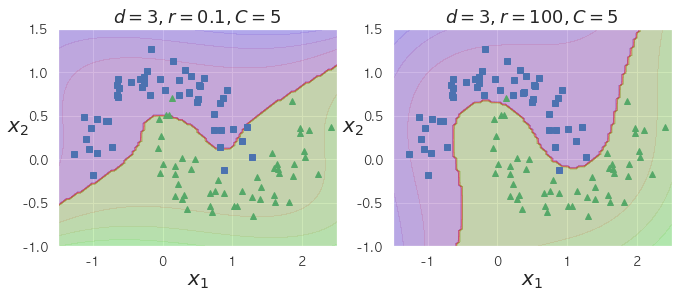

In [72]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=0.1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=100, C=5$", fontsize=18)

plt.show()

### 5.2.2 유사도 특성 추가

비선형 특성을 다루는 또 다른 방법은 각 데이터(샘플)이 특정 **랜드마크**(landmark)와 얼마나 닮았는지 측정하는 **유사도 함수**(similarity function)로 계산한 특성을 추가하는 것이다. 

예를 들어, 아래의 그래프와 같이 $x_2 = -2$와 $x_3 = 1$을 랜드마크라고 하고, $\gamma = 0.3$인 가우시안 **RBF**(Radial Basis Function, 방사 기저 함수)를 유사도 함수라고 정의해보자.

$$
\phi_{\gamma} \left( \mathbf{x}, \ell \right) = \text{exp} \left( -\gamma \left\| \mathbf{x} - \ell \right\|^{2} \right)
$$

- $\ell$ : 랜드마크 지점
- $\gamma$ : $\gamma > 0$ 이며, 값이 작을 수록 넓은 종 모양(bell shape)이 됨

예를 들어, $x_1 = -1$일 경우 

- 첫 번째 랜드마크인 $x_1 = -2$에서 $\| -1 - (-2) \| = 1$ 
- 두 번째 랜드마크인 $x_2 = 1$에서 $2$

만큼 떨어져 있다.

따라서, $x_1$의 새로운 특성은 $x_2 = \text{exp}(-0.3 \times 1^2) \approx 0.74$ 와 $x_3 = \text{exp}(-0.3 \times 2^2) \approx 0.30$이다. 

이러한, 유사도 특성 추가를 통해 아래의 오른쪽 그래프와 같이 선형분리가 가능하다.

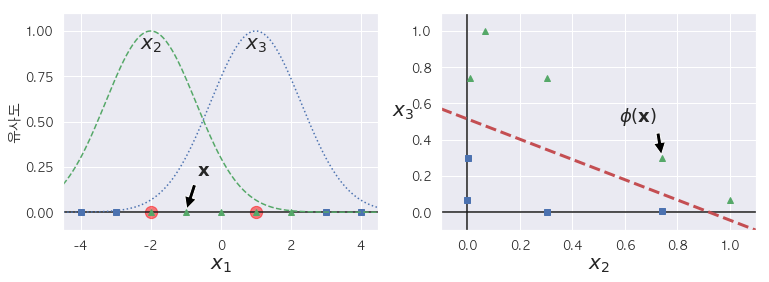

In [75]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"유사도", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

### 5.2.3 가우시안 RBF 커널

위의 5.2.2에서 살펴본 것처럼 유사도 특성을 추가하는 방법도 유용하게 사용될 수 있다. 하지만, 이러한 특성을 추가하기 위해서는 계산 비용이 많이 드는 문제가 있다. 

이를 가우시안 **RBF Kernel**을 이용하면 위와 같이 특성들을 계산하지 않고 비슷한 결과를 얻을 수 있다.

$$
K \left( \mathbf{a}, \mathbf{b} \right) = \text{exp} \left( -\gamma \left\| \mathbf{a} - \mathbf{b} \right\|^{2} \right)
$$

- $\gamma$ : regularization 역할을 함
    - $\gamma$가 커지면 종 모양이 좁아져 각 데이터의 영향 범위가 작아져, 결정 경계(Decision Boundary)가 불규칙하고 구부러진다.
    - $\gamma$가 작아지면 넓은 종 모양이 되며, 데이터의 영향이 넓어져 결정 경계가 부드러워 진다. 

In [76]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

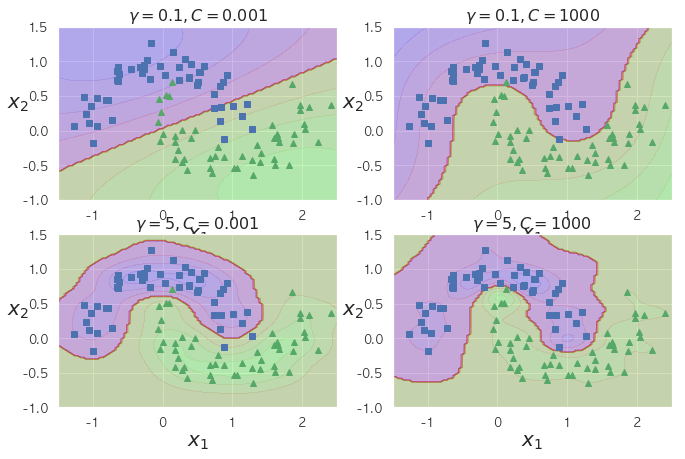

In [81]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

#### Tip : 어떤 커널(kernel)을 사용할까?

> 가장먼저 선형 커널(linear kernel)을 사용해본다. 특히, Train set이 매우 크거나, 특성 수가 많을 경우에 해당되며, Scikit-Learn에서는 `LinearSVC`가 `SVC(kernel='linear')` 보다 훨씬 빠르다. 

>Train set이 크지 않다면, 가우시안 RBF 커널을 시도하는 것이 좋고, 대부분의 경우 이 커널이 잘 맞는다고 한다.

## 5.3 SVM Regression